# 히든레이어

- 보스턴 집값 예측: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv

- 아이리스 품종 분류: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv

지금까지는 퍼셉트론 하나만을 이용한 모델을 사용했고 이번에는 히든레이어를 쌓아보면서 진짜 딥러닝 모델을 구현해봅시다!

In [3]:
# 라이브러리 import

import pandas as pd
import tensorflow as tf

# 보스턴 집값 예측

In [5]:
# 과거의 데이터를 준비합니다.

url = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(url)

In [8]:
print(boston.shape)

boston.columns

(506, 14)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [19]:
# 종속변수, 독립변수

독립 = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age','dis', 'rad', 'tax','ptratio', 'b', 'lstat']]

종속 = boston[['medv']]

print(x.shape, y.shape)

(506, 13) (506, 1)


In [22]:
# 모델의 구조를 만듭니다.

X = tf.keras.layers.Input(shape=[13])

# ---Hidden Layer--- 10개의 노드, swish 액티베이션 사용

H = tf.keras.layers.Dense(10, activation='swish')(X)

# ---Hidden Layer---
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [49]:
# 데이터로 모델을 학습합니다.

model.fit(독립, 종속, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 810us/step - loss: 17.2408
Epoch 2/100
16/16 [==============================] - 0s 748us/step - loss: 17.3329
Epoch 3/100
16/16 [==============================] - 0s 810us/step - loss: 16.2126
Epoch 4/100
16/16 [==============================] - 0s 748us/step - loss: 16.3052
Epoch 5/100
16/16 [==============================] - 0s 873us/step - loss: 17.9367
Epoch 6/100
16/16 [==============================] - 0s 561us/step - loss: 17.8215
Epoch 7/100
16/16 [==============================] - 0s 561us/step - loss: 16.2105
Epoch 8/100
16/16 [==============================] - 0s 623us/step - loss: 16.3863
Epoch 9/100
16/16 [==============================] - 0s 561us/step - loss: 18.5120
Epoch 10/100
16/16 [==============================] - 0s 686us/step - loss: 16.6350
Epoch 11/100
16/16 [==============================] - 0s 748us/step - loss: 18.2838
Epoch 12/100
16/16 [==============================] - 0s 810us/step - loss: 17.1034
E

16/16 [==============================] - 0s 561us/step - loss: 18.2182
Epoch 99/100
16/16 [==============================] - 0s 436us/step - loss: 15.0786
Epoch 100/100
16/16 [==============================] - 0s 623us/step - loss: 16.7305


In [28]:
# 모델의 형태를 확인해 봅시다
# 출력 레이어 Param (11)의 의미는 히든 레이어에서 찾는 가중치로 
# 10개의 입력을 받아서 1개의 출력을 만드니까 수식(항)이 10개고 마지막 Bias가 1개 추가되어 11이다.

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델을 이용합니다.

print(model.predict(독립[:5]))
print(종속[:5])

[[31.358442]
 [22.879555]
 [31.99483 ]
 [35.564285]
 [34.258034]]
   medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [51]:
import matplotlib.pyplot as plt

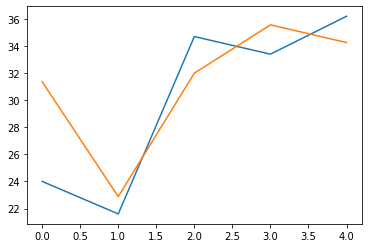

In [52]:
plt.plot(종속[:5])
plt.plot(model.predict(독립[:5]))

# 아이리스 품종 분류

In [53]:
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)

# 원핫인코딩
아이리스 = pd.get_dummies(아이리스)

# 종속변수, 독립변수
독립 = 아이리스[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = 아이리스[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [55]:
# 모델의 구조를 만듭니다.

X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)

Y = tf.keras.layers.Dense(3, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy',
             metrics='accuracy')

In [59]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 데이터로 모델을 학습합니다.

model.fit(독립, 종속, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 798us/step - loss: 1.1998 - accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 798us/step - loss: 1.1157 - accuracy: 0.2133
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 1.0870 - accuracy: 0.1133
Epoch 4/10
5/5 [==============================] - 0s 798us/step - loss: 1.0665 - accuracy: 0.2600
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 1.0506 - accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 797us/step - loss: 1.0370 - accuracy: 0.5333
Epoch 7/10
5/5 [==============================] - 0s 798us/step - loss: 1.0234 - accuracy: 0.6200
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0117 - accuracy: 0.6933
Epoch 9/10
5/5 [==============================] - 0s 998us/step - loss: 0.9987 - accuracy: 0.6667
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.9859 - accuracy: 0.6667


In [67]:
# 모델을 이용합니다.

print(model.predict(독립[0:5]))
print(종속[0:5])

[[9.9807191e-01 1.9281162e-03 5.7825131e-13]
 [9.9592376e-01 4.0762308e-03 1.2962171e-11]
 [9.9690598e-01 3.0940012e-03 5.9432342e-12]
 [9.9498874e-01 5.0112209e-03 3.9788964e-11]
 [9.9816692e-01 1.8330379e-03 5.2148856e-13]]
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0
1          1              0             0
2          1              0             0
3          1              0             0
4          1              0             0
